<a href="https://colab.research.google.com/github/AtheerMalki/Module04_ML/blob/main/ML9_assignment_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression
Using the same seattle weather data as last chapter develop a linear regression model

In [ ]:
#import the pakcages that we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/russellromney/seattle-weather/master/seattleWeather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'intercept':[1] * numrows,
                             'yesterday':[0.0] * numrows,
                             'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows})

#sort columns for convience
seq = ['intercept',
       'yesterday',
       'today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

In [ ]:
for i in range(0 , numrows):
    yesterday = df.iloc[i,1]
    tomorrow = df.iloc[i+1,1]
    today = df.iloc[(i+2),1]
    regression_df.iat[i,1] = yesterday
    regression_df.iat[i,2] = today
    regression_df.iat[i,3] = tomorrow

regression_df = regression_df.dropna() #exclude any rows with missing data

In [ ]:
#this makes a simple dataframe with a relationship that we can now plot
regression_df.info()
regression_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25542 entries, 0 to 25548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   intercept  25542 non-null  int64  
 1   yesterday  25542 non-null  float64
 2   today      25542 non-null  float64
 3   tomorrow   25542 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 997.7 KB


,intercept,yesterday,today,tomorrow
0,1,0.47,0.42,0.59
1,1,0.59,0.31,0.42
2,1,0.42,0.17,0.31
3,1,0.31,0.44,0.17
4,1,0.17,0.41,0.44


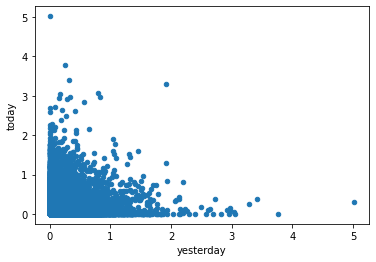

In [ ]:
#sns.scatterplot(x='today',y='tomorrow',data=regression_df)
regression_df.plot(kind='scatter', x='yesterday', y='today')

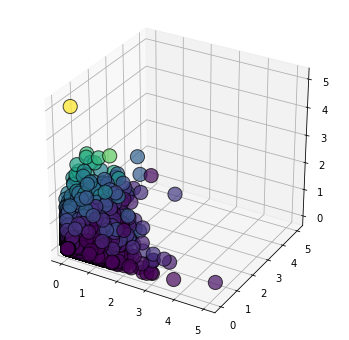

In [ ]:
x=regression_df['yesterday']
y=regression_df['today']
z=regression_df['tomorrow']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

# New Section

In [ ]:
X=regression_df[['yesterday', 'today']]
y=regression_df['tomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y)

<function matplotlib.pyplot.show>

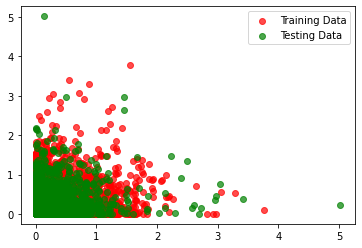

In [ ]:
#plt.scatter(X_train, y_train, label='Training Data', color='red', alpha=0.7)
#plt.scatter(X_test, y_test, label='Testing Data', color='green', alpha=0.7)
#plt.legend()
#plt.title('training and testing data')
#plt.show
# x has two columns, y has 1 = problems.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = lr.predict(X_test.values)

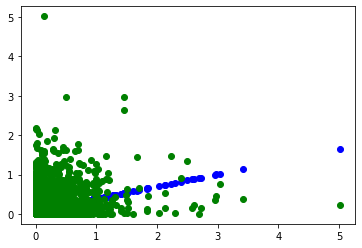

In [ ]:
plt.scatter(X_test, prediction, color='blue')
plt.scatter(X_test, y_test, color='green')

In [ ]:
sklearn.metrics.r2_score(X_test, prediction)

0.5276300090695332

# New Section

Creating a basic linear model to best predict these values. Start with a slope and intercept values of 1 and then iterate through gradient descent.

In [ ]:
def gradientDescent(X, y, param, alpha, num_iters):
    """
       Performs gradient descent to learn param
    """
    for i in range(num_iters):
        y_hat = np.dot(X, param) # notice we use numpy here to efficently calculate the values
        param = param - alpha * np.dot(X.T, y_hat-y)
    return param

In this fucntion *param* is the initial guess of the values of the linear function and 
*X* is the vector of data values and y is the realization

In [ ]:
X = regression_df.iloc[0:200:,0:2]
y = regression_df.iloc[0:200:,2]
param = np.array([1,1])
alpha = 0.0001
num_iters = 1000

solution = gradientDescent(X, y, param, alpha, num_iters)
solution

array([0.08776347, 0.24539117])

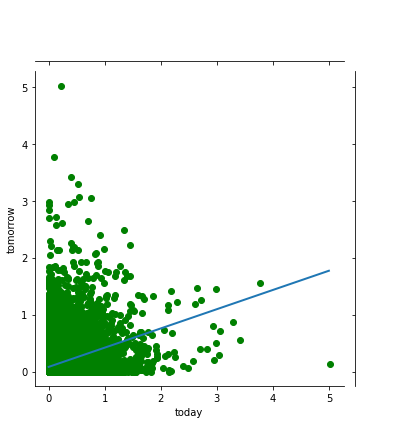

In [ ]:
grid = sns.JointGrid(x=regression_df.today,y=regression_df.tomorrow)
grid.plot_joint(plt.scatter, color="g")
plt.plot([0, 5], [0.0811, 1.77], linewidth=2)

However, building models from scratch is hard! Lucky for us there is a very popular library that trains models for us!

In [ ]:
from sklearn import linear_model
#modify the data to work with this library
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)
y = y.reshape(regression_df.shape[0], 1)

In [ ]:
mymodel = linear_model.LinearRegression().fit(x,y)

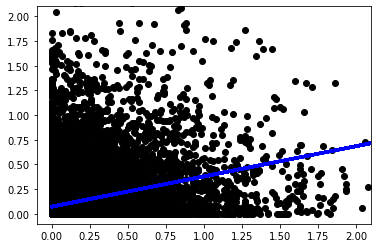

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, mymodel.predict(x), color='blue', linewidth=3)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [ ]:
# using the r2 (pronounced r squared) value we can get a basic measure of model quality
from sklearn.metrics import r2_score
r2_score(y,mymodel.predict(x))

0.09365441125285323

We can plot the difference between the predictions and the actual values for a visual estimate of performance. A perfect model would result in this being a straight line with a slope of 1. Notice how the model predicts only lower values, meaning that it tends to under predict the actual amount of rain.

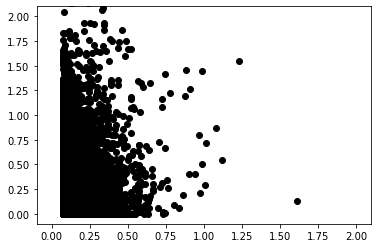

In [ ]:
plt.scatter(mymodel.predict(x), y,  color='black')
plt.xlim(-0.1,2.1) #to keep the same scale as the previous plot
plt.ylim(-0.1,2.1) # same reason as xlim
plt.show()

### From this point modify the scikit-learn linear regression method to use two variables.
Hint. Your x values should have the same number of rows but two columns. You will not be able to plot the line (as it will be 3 dimensional) but you can plot the model predictions agains the actual values.

In [ ]:
numrows = 25547 

###################### adjust this code to add columns here #######################################
regression_df = pd.DataFrame({'today':[0.0]*numrows,
                             'tomorrow':[0.0]*numrows})

#sort columns for convience
seq = ['today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    regression_df.iat[i,1] = tomorrow
    regression_df.iat[i,0] = today

regression_df = regression_df.dropna() #exclude any rows with missing data
#####################################################################################################